# Predicting myopia, or nearsightedness using unsupervised machine learning

# Myopia dataset
- AGE: Participant's age at first visit (years)
- SPHEQ: Spherical Equivalent Refraction (diopter)
- AL: Axial Length (mm)
- ACD: Anterior Chamber Depth (mm)
- LT: Lens Thickness (mm)
- VCD: Vitreous Chamber Depth (mm)
- SPORTHR: Time spent engaging in sports/outdoor activities (hours per week)
- READHR: Time spent reading for pleasure (hours per week)
- COMPHR: Time spent playing video/computer games or working on the computer (hours per week)
- STUDYHR: Time spent reading or studying for school assignments (hours per week)
- TVHR: Time spent watching television (hours per week)
- DIOPTERHR: Composite of near-work activities (hours per week)
- MOMMY: Was the subject’s mother myopic? (No (0) /Yes (1))
- DADMY: Was the subject’s father myopic? (No (0) /Yes (1))
- MYOPIC: Myopia within the first five years of follow up (No (0) /Yes (1))

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Part 1: Prepare the Data

### 1.1 Load the myopia dataset

In [2]:
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# df Shape(get the number of columns and rows)
df.shape

(618, 15)

### Preprocess the data
#### Note: In order to use unsupervised learning algorithms, all the features should be numeric, and also, on similar scales. Perform data transformations if necessary.

In [4]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

### 1.2 Remove the "MYOPIC" column from the dataset.

In [5]:
# Remove the "MYOPIC" column from the dataset.
new_df = df.drop("MYOPIC", axis=1)
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
# df Shape(get the number of columns and rows)
new_df.shape

(618, 14)

In [7]:
# List dataframe data types
new_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [8]:
# Find null values, drop the rows if there are any
new_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [9]:
# Find duplicate entries, drop rows if there are any
new_df.duplicated().sum()

0

### 1.3 Standardize the dataset using scaler

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a scaler to standardize the data
scaler = StandardScaler()

#fit_transform
scaled_data = scaler.fit_transform(new_df)

In [11]:
# Create a DataFrame X with the transformed data
X = pd.DataFrame(scaled_data, columns=new_df.columns[0:])

# Add the MYOPIC Column back
X['MYOPIC'] = df['MYOPIC']
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,0
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,0


In [12]:
# Save the cleaned and transformed DataFrame as a new CSV file for further use
file_path = Path("clean_myopia.csv")
X.to_csv(file_path, index=False)

# Part 2: Apply Dimensionality Reduction

### 2.1. Perform dimensionality reduction with PCA(Principal Component Analysis). 

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Initialize PCA model
pca = PCA(n_components= .9) 

# Get two principal components for the data.
myopia_pca = pca.fit_transform(scaled_data)
myopia_pca.shape

(618, 10)

In [15]:
# Fetch the explained variance and get the sum
sum(pca.explained_variance_ratio_)

0.9187361702915187

### 2.2 Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.


In [16]:
from sklearn.manifold import TSNE

In [17]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100) 

In [18]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

/Users/rg1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [19]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

### 2.3. Create a scatter plot of the t-SNE output.

In [20]:
# Prepare to plot the dataset
tsne_df = pd.DataFrame()

# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

# Create labels using the MYOPIC columns from the transformed data
labels = X['MYOPIC']
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

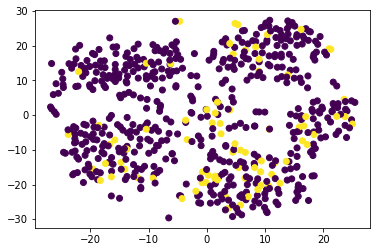

In [21]:
# Visualize the clusters with color
plt.scatter(tsne_df['x'], tsne_df['y'],c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [22]:
#Identify the best number of clusters using the elbow curve
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)  
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


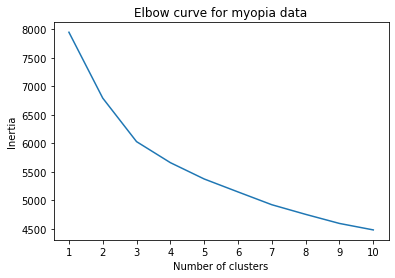

In [23]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

# Part 4: Make a Recommendation

### Findings:
-	The PCA(Principal Component Analysis) reduced the features to 10 dimensions(columns).  The explained variance captured 91.8% for n_components of 90%.

-	The T_SNE model reduced the features to 2 dimensions(columns) for learning_rate = 100. The model was tested using various learning_rate from 10 – 100 and the result are the same. The scatter plot is showing no distinct clusters with fewer patients with myopia. 

-	 The elbow plot are showing at the following points:
1.	Number of clusters 2 and inertia between 6500 and 7000
2.	Number of clusters 3 and inertia around 6000


### Recommendations:
For the given data for this analysis, the model and clustering algorithm results shows that the patients cannot be clustered together due to limited data. Use a bigger dataset and test it using the above clustering algorithm to be able to make more accurate predictions and clustering.